In [1]:
%matplotlib inline
from matplotlib import pyplot as plt

In [2]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=RuntimeWarning)
warnings.simplefilter("ignore")

In [3]:
from IPython.display import YouTubeVideo, Image

# [XARRAY](https://github.com/xray/xray)

[xarray](https://github.com/xarray/xarray) (formerly `xray`) has been developed by scientists / engineers working at the [Climate Corporation](http://climate.com/)

It is an open source project and Python package that aims to bring
the labeled data power of [pandas](http://pandas.pydata.org) to the
physical sciences, by providing N-dimensional variants of the core
[pandas](http://pandas.pydata.org) data structures, `Series` and
`DataFrame`: the xarray `DataArray` and `Dataset`.

the goal is to provide a pandas-like and pandas-compatible toolkit for
analytics on multi-dimensional arrays, rather than the tabular data for
which pandas excels. The approach adopts the [Common Data
Model](http://www.unidata.ucar.edu/software/thredds/current/netcdf-java/CDM)
for self-describing scientific data in widespread use in the Earth
sciences (e.g., [netCDF](http://www.unidata.ucar.edu/software/netcdf)
and [OPeNDAP](http://www.opendap.org/)): `xray.Dataset` is an in-memory
representation of a netCDF file.

-   HTML documentation: <http://xarray.readthedocs.org>: **really good doc !**
-   Source code: <http://github.com/xarray/xarray>

The main advantages of using [xarray](https://github.com/xarray/xarray) versus [netCDF4](https://github.com/Unidata/netcdf4-python) are: 

+ intelligent selection along **labelled dimensions** (and also indexes)
+ **groupby** operations
+ **resampling** operations
+ data alignment 
+ IO (netcdf)
+ conversion from / to [Pandas.DataFrames](http://pandas.pydata.org/pandas-docs/dev/generated/pandas.DataFrame.html)


To install the latest version of xarray (via conda): 

    ᐅ conda install xarray

or if you want the bleeding edge: 


    ᐅ pip install git+https://github.com/xarray/xarray

There's too much to see in the context of this talk, to know more about all the cool **xarray** features, watch: 

PyData talk by **Stefan Hoyer**: <https://www.youtube.com/watch?v=T5CZyNwBa9c>

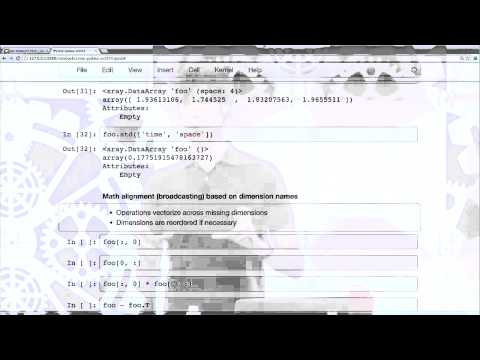

In [4]:
YouTubeVideo('T5CZyNwBa9c', width=500, height=400, start=0)

## Some examples

In [5]:
%matplotlib inline
from matplotlib import pyplot as plt

In [6]:
import os
import numpy as np
import pandas as pd

In [7]:
import xarray as xr; print(xr.__version__)

0.12.0


### Open a netcdf file: monthly HGT from NCEP / NCAR from January 1948 to July 2017

The file (270 Mb) can be downloaded at [ftp://ftp.cdc.noaa.gov/Datasets/ncep.reanalysis.derived/pressure/hgt.mon.mean.nc](ftp://ftp.cdc.noaa.gov/Datasets/ncep.reanalysis.derived/pressure/hgt.mon.mean.nc)

In [8]:
dset = xr.open_dataset('../data/hgt.2019.nc')

In [9]:
dset.info

<bound method Dataset.info of <xarray.Dataset>
Dimensions:    (lat: 73, level: 17, lon: 144, nbnds: 2, time: 92)
Coordinates:
  * level      (level) float32 1000.0 925.0 850.0 700.0 ... 50.0 30.0 20.0 10.0
  * lat        (lat) float32 90.0 87.5 85.0 82.5 ... -82.5 -85.0 -87.5 -90.0
  * lon        (lon) float32 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
  * time       (time) datetime64[ns] 2019-01-01 2019-01-02 ... 2019-04-02
Dimensions without coordinates: nbnds
Data variables:
    hgt        (time, level, lat, lon) float32 ...
    time_bnds  (time, nbnds) float64 ...
Attributes:
    Conventions:    COARDS
    title:          mean daily NMC reanalysis (2014)
    history:        created 2013/12 by Hoop (netCDF2.3)
    description:    Data is from NMC initialized reanalysis\n(4x/day).  It co...
    platform:       Model
    References:     http://www.esrl.noaa.gov/psd/data/gridded/data.ncep.reana...
    dataset_title:  NCEP-NCAR Reanalysis 1>

**dset** is a [xray.Dataset](http://xray.readthedocs.org/en/stable/data-structures.html#dataset), It is a dict-like container of labeled arrays (DataArray objects) with aligned dimensions. It is designed as an in-memory representation of the data model from the netCDF file format.

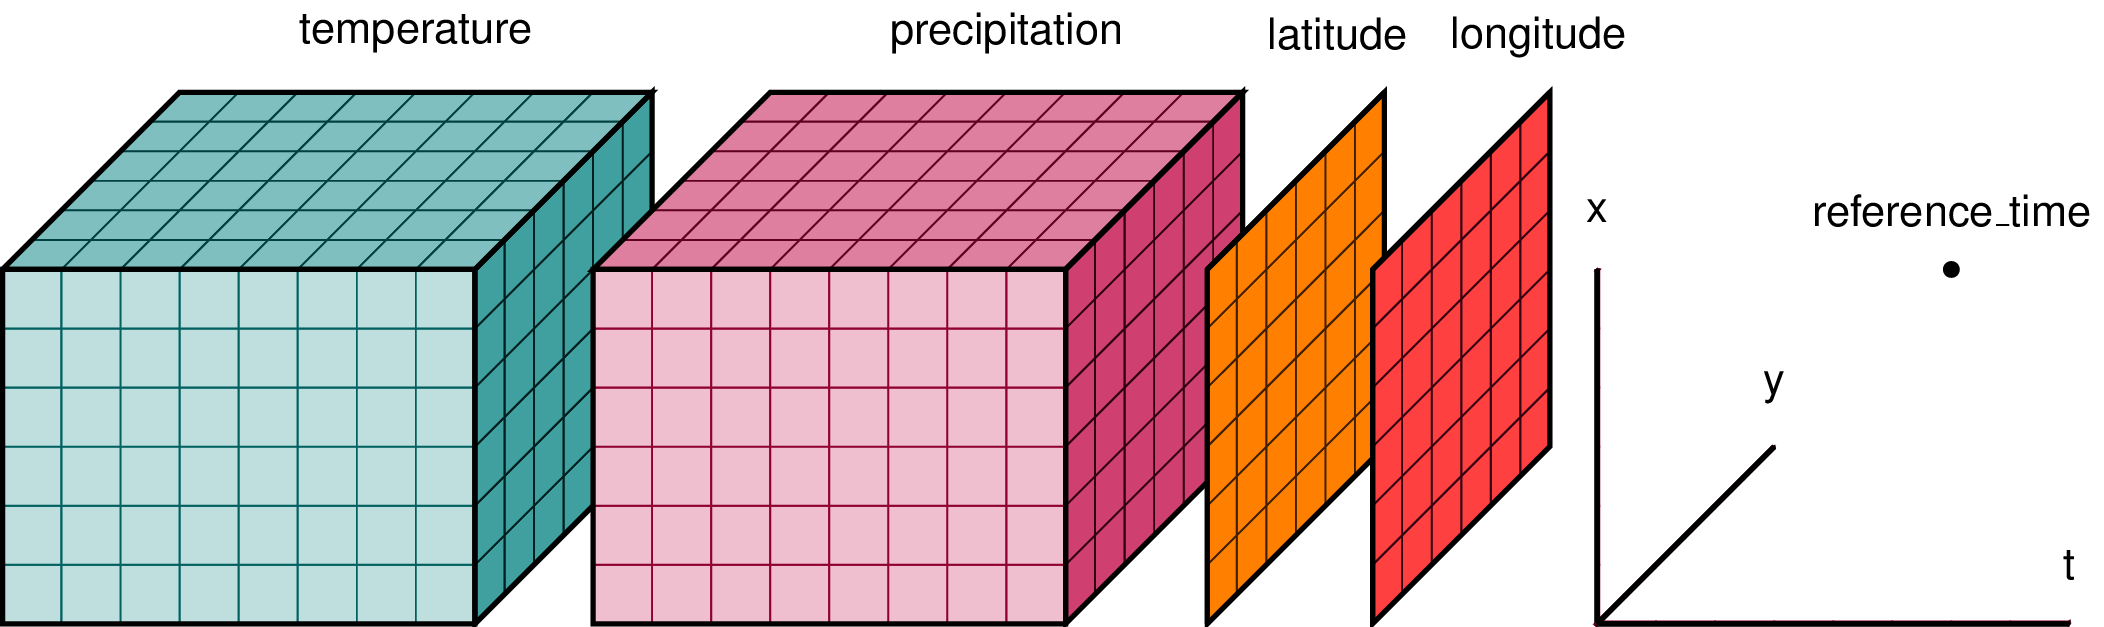

In [10]:
Image('http://xarray.pydata.org/en/stable/_images/dataset-diagram.png', width=700)

In [11]:
dset.dims

Frozen(SortedKeysDict({'level': 17, 'lat': 73, 'lon': 144, 'time': 92, 'nbnds': 2}))

### accessing variables

In [12]:
lat = dset['lat']

In [13]:
lat

<xarray.DataArray 'lat' (lat: 73)>
array([ 90. ,  87.5,  85. ,  82.5,  80. ,  77.5,  75. ,  72.5,  70. ,  67.5,
        65. ,  62.5,  60. ,  57.5,  55. ,  52.5,  50. ,  47.5,  45. ,  42.5,
        40. ,  37.5,  35. ,  32.5,  30. ,  27.5,  25. ,  22.5,  20. ,  17.5,
        15. ,  12.5,  10. ,   7.5,   5. ,   2.5,   0. ,  -2.5,  -5. ,  -7.5,
       -10. , -12.5, -15. , -17.5, -20. , -22.5, -25. , -27.5, -30. , -32.5,
       -35. , -37.5, -40. , -42.5, -45. , -47.5, -50. , -52.5, -55. , -57.5,
       -60. , -62.5, -65. , -67.5, -70. , -72.5, -75. , -77.5, -80. , -82.5,
       -85. , -87.5, -90. ], dtype=float32)
Coordinates:
  * lat      (lat) float32 90.0 87.5 85.0 82.5 80.0 ... -82.5 -85.0 -87.5 -90.0
Attributes:
    units:          degrees_north
    actual_range:   [ 90. -90.]
    long_name:      Latitude
    standard_name:  latitude
    axis:           Y

In [14]:
type(lat)

xarray.core.dataarray.DataArray

In [15]:
lat.attrs

OrderedDict([('units', 'degrees_north'),
             ('actual_range', array([ 90., -90.], dtype=float32)),
             ('long_name', 'Latitude'),
             ('standard_name', 'latitude'),
             ('axis', 'Y')])

In [16]:
type(lat.data)

numpy.ndarray

In [17]:
lat.data

array([ 90. ,  87.5,  85. ,  82.5,  80. ,  77.5,  75. ,  72.5,  70. ,
        67.5,  65. ,  62.5,  60. ,  57.5,  55. ,  52.5,  50. ,  47.5,
        45. ,  42.5,  40. ,  37.5,  35. ,  32.5,  30. ,  27.5,  25. ,
        22.5,  20. ,  17.5,  15. ,  12.5,  10. ,   7.5,   5. ,   2.5,
         0. ,  -2.5,  -5. ,  -7.5, -10. , -12.5, -15. , -17.5, -20. ,
       -22.5, -25. , -27.5, -30. , -32.5, -35. , -37.5, -40. , -42.5,
       -45. , -47.5, -50. , -52.5, -55. , -57.5, -60. , -62.5, -65. ,
       -67.5, -70. , -72.5, -75. , -77.5, -80. , -82.5, -85. , -87.5,
       -90. ], dtype=float32)

### selecting a Dataset along dimensions

In [18]:
dset

<xarray.Dataset>
Dimensions:    (lat: 73, level: 17, lon: 144, nbnds: 2, time: 92)
Coordinates:
  * level      (level) float32 1000.0 925.0 850.0 700.0 ... 50.0 30.0 20.0 10.0
  * lat        (lat) float32 90.0 87.5 85.0 82.5 ... -82.5 -85.0 -87.5 -90.0
  * lon        (lon) float32 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
  * time       (time) datetime64[ns] 2019-01-01 2019-01-02 ... 2019-04-02
Dimensions without coordinates: nbnds
Data variables:
    hgt        (time, level, lat, lon) float32 ...
    time_bnds  (time, nbnds) float64 ...
Attributes:
    Conventions:    COARDS
    title:          mean daily NMC reanalysis (2014)
    history:        created 2013/12 by Hoop (netCDF2.3)
    description:    Data is from NMC initialized reanalysis\n(4x/day).  It co...
    platform:       Model
    References:     http://www.esrl.noaa.gov/psd/data/gridded/data.ncep.reana...
    dataset_title:  NCEP-NCAR Reanalysis 1

In [19]:
dset.sel(time='2019-01-01')

<xarray.Dataset>
Dimensions:    (lat: 73, level: 17, lon: 144, nbnds: 2)
Coordinates:
  * level      (level) float32 1000.0 925.0 850.0 700.0 ... 50.0 30.0 20.0 10.0
  * lat        (lat) float32 90.0 87.5 85.0 82.5 ... -82.5 -85.0 -87.5 -90.0
  * lon        (lon) float32 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
    time       datetime64[ns] 2019-01-01
Dimensions without coordinates: nbnds
Data variables:
    hgt        (level, lat, lon) float32 ...
    time_bnds  (nbnds) float64 ...
Attributes:
    Conventions:    COARDS
    title:          mean daily NMC reanalysis (2014)
    history:        created 2013/12 by Hoop (netCDF2.3)
    description:    Data is from NMC initialized reanalysis\n(4x/day).  It co...
    platform:       Model
    References:     http://www.esrl.noaa.gov/psd/data/gridded/data.ncep.reana...
    dataset_title:  NCEP-NCAR Reanalysis 1

### integer indexing also available via `isel`

In [20]:
dset.isel(time=0)

<xarray.Dataset>
Dimensions:    (lat: 73, level: 17, lon: 144, nbnds: 2)
Coordinates:
  * level      (level) float32 1000.0 925.0 850.0 700.0 ... 50.0 30.0 20.0 10.0
  * lat        (lat) float32 90.0 87.5 85.0 82.5 ... -82.5 -85.0 -87.5 -90.0
  * lon        (lon) float32 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
    time       datetime64[ns] 2019-01-01
Dimensions without coordinates: nbnds
Data variables:
    hgt        (level, lat, lon) float32 ...
    time_bnds  (nbnds) float64 ...
Attributes:
    Conventions:    COARDS
    title:          mean daily NMC reanalysis (2014)
    history:        created 2013/12 by Hoop (netCDF2.3)
    description:    Data is from NMC initialized reanalysis\n(4x/day).  It co...
    platform:       Model
    References:     http://www.esrl.noaa.gov/psd/data/gridded/data.ncep.reana...
    dataset_title:  NCEP-NCAR Reanalysis 1

### and you can slice along one or multiple dimensions 

In [21]:
dset.sel(time=slice('2019-01-01','2019-01-31'))

<xarray.Dataset>
Dimensions:    (lat: 73, level: 17, lon: 144, nbnds: 2, time: 31)
Coordinates:
  * level      (level) float32 1000.0 925.0 850.0 700.0 ... 50.0 30.0 20.0 10.0
  * lat        (lat) float32 90.0 87.5 85.0 82.5 ... -82.5 -85.0 -87.5 -90.0
  * lon        (lon) float32 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
  * time       (time) datetime64[ns] 2019-01-01 2019-01-02 ... 2019-01-31
Dimensions without coordinates: nbnds
Data variables:
    hgt        (time, level, lat, lon) float32 ...
    time_bnds  (time, nbnds) float64 ...
Attributes:
    Conventions:    COARDS
    title:          mean daily NMC reanalysis (2014)
    history:        created 2013/12 by Hoop (netCDF2.3)
    description:    Data is from NMC initialized reanalysis\n(4x/day).  It co...
    platform:       Model
    References:     http://www.esrl.noaa.gov/psd/data/gridded/data.ncep.reana...
    dataset_title:  NCEP-NCAR Reanalysis 1

### when selecting along any dimension, you need to respect the ORDER of the dimensions, i.e. in this case, the latitudes go from NORTH TO SOUTH 

In [22]:
dset.sel(time=slice('2019-01-01','2019-01-31'), lat=slice(40,-40))

<xarray.Dataset>
Dimensions:    (lat: 33, level: 17, lon: 144, nbnds: 2, time: 31)
Coordinates:
  * level      (level) float32 1000.0 925.0 850.0 700.0 ... 50.0 30.0 20.0 10.0
  * lat        (lat) float32 40.0 37.5 35.0 32.5 ... -32.5 -35.0 -37.5 -40.0
  * lon        (lon) float32 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
  * time       (time) datetime64[ns] 2019-01-01 2019-01-02 ... 2019-01-31
Dimensions without coordinates: nbnds
Data variables:
    hgt        (time, level, lat, lon) float32 ...
    time_bnds  (time, nbnds) float64 ...
Attributes:
    Conventions:    COARDS
    title:          mean daily NMC reanalysis (2014)
    history:        created 2013/12 by Hoop (netCDF2.3)
    description:    Data is from NMC initialized reanalysis\n(4x/day).  It co...
    platform:       Model
    References:     http://www.esrl.noaa.gov/psd/data/gridded/data.ncep.reana...
    dataset_title:  NCEP-NCAR Reanalysis 1

### or you can sort 

In [23]:
if dset.lat[0] > dset.lat[-1]: 
    dset = dset.sortby('lat')

In [24]:
dset.sel(time=slice('2019-01-01','2019-01-31'), lat=slice(-40,40))

<xarray.Dataset>
Dimensions:    (lat: 33, level: 17, lon: 144, nbnds: 2, time: 31)
Coordinates:
  * level      (level) float32 1000.0 925.0 850.0 700.0 ... 50.0 30.0 20.0 10.0
  * lat        (lat) float32 -40.0 -37.5 -35.0 -32.5 ... 32.5 35.0 37.5 40.0
  * lon        (lon) float32 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
  * time       (time) datetime64[ns] 2019-01-01 2019-01-02 ... 2019-01-31
Dimensions without coordinates: nbnds
Data variables:
    hgt        (time, level, lat, lon) float32 186.5 187.25 ... 30410.5 30402.25
    time_bnds  (time, nbnds) float64 1.92e+06 1.92e+06 ... 1.92e+06 1.92e+06
Attributes:
    Conventions:    COARDS
    title:          mean daily NMC reanalysis (2014)
    history:        created 2013/12 by Hoop (netCDF2.3)
    description:    Data is from NMC initialized reanalysis\n(4x/day).  It co...
    platform:       Model
    References:     http://www.esrl.noaa.gov/psd/data/gridded/data.ncep.reana...
    dataset_title:  NCEP-NCAR Reanalysis 1

In [25]:
subset = dset.sel(time='2019-01-01', level=1000, lat=slice(-50,40), lon=slice(100, 220))

In [26]:
subset

<xarray.Dataset>
Dimensions:    (lat: 37, lon: 49, nbnds: 2)
Coordinates:
    level      float32 1000.0
  * lat        (lat) float32 -50.0 -47.5 -45.0 -42.5 ... 32.5 35.0 37.5 40.0
  * lon        (lon) float32 100.0 102.5 105.0 107.5 ... 212.5 215.0 217.5 220.0
    time       datetime64[ns] 2019-01-01
Dimensions without coordinates: nbnds
Data variables:
    hgt        (lat, lon) float32 67.75 57.0 47.75 40.5 ... 193.75 210.0 226.0
    time_bnds  (nbnds) float64 1.92e+06 1.92e+06
Attributes:
    Conventions:    COARDS
    title:          mean daily NMC reanalysis (2014)
    history:        created 2013/12 by Hoop (netCDF2.3)
    description:    Data is from NMC initialized reanalysis\n(4x/day).  It co...
    platform:       Model
    References:     http://www.esrl.noaa.gov/psd/data/gridded/data.ncep.reana...
    dataset_title:  NCEP-NCAR Reanalysis 1

In [27]:
subset = subset.drop('time_bnds')

In [28]:
subset

<xarray.Dataset>
Dimensions:  (lat: 37, lon: 49)
Coordinates:
    level    float32 1000.0
  * lat      (lat) float32 -50.0 -47.5 -45.0 -42.5 -40.0 ... 32.5 35.0 37.5 40.0
  * lon      (lon) float32 100.0 102.5 105.0 107.5 ... 212.5 215.0 217.5 220.0
    time     datetime64[ns] 2019-01-01
Data variables:
    hgt      (lat, lon) float32 67.75 57.0 47.75 40.5 ... 193.75 210.0 226.0
Attributes:
    Conventions:    COARDS
    title:          mean daily NMC reanalysis (2014)
    history:        created 2013/12 by Hoop (netCDF2.3)
    description:    Data is from NMC initialized reanalysis\n(4x/day).  It co...
    platform:       Model
    References:     http://www.esrl.noaa.gov/psd/data/gridded/data.ncep.reana...
    dataset_title:  NCEP-NCAR Reanalysis 1

In [29]:
subset['hgt']

<xarray.DataArray 'hgt' (lat: 37, lon: 49)>
array([[ 67.75,  57.  ,  47.75, ..., -38.75, -44.25, -43.  ],
       [ 35.25,  23.75,  19.25, ...,   5.75,   2.  ,   3.  ],
       [ -9.25, -17.75, -13.75, ...,  44.75,  41.75,  39.75],
       ...,
       [280.25, 260.  , 265.25, ..., 228.  , 232.75, 237.  ],
       [260.5 , 254.5 , 268.5 , ..., 215.75, 224.25, 233.25],
       [249.75, 261.5 , 285.  , ..., 193.75, 210.  , 226.  ]], dtype=float32)
Coordinates:
    level    float32 1000.0
  * lat      (lat) float32 -50.0 -47.5 -45.0 -42.5 -40.0 ... 32.5 35.0 37.5 40.0
  * lon      (lon) float32 100.0 102.5 105.0 107.5 ... 212.5 215.0 217.5 220.0
    time     datetime64[ns] 2019-01-01
Attributes:
    long_name:     mean Daily Geopotential height
    units:         m
    precision:     0
    GRIB_id:       7
    GRIB_name:     HGT
    var_desc:      Geopotential height
    level_desc:    Multiple levels
    statistic:     Mean
    parent_stat:   Individual Obs
    valid_range:   [ -700. 35000.]
 

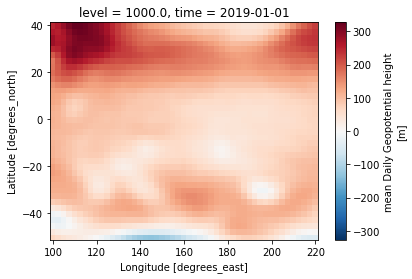

In [30]:
subset['hgt'].plot()

### basic mapping with cartopy

In [31]:
import cartopy.crs as ccrs

In [32]:
crs = ccrs.PlateCarree(central_longitude=180)

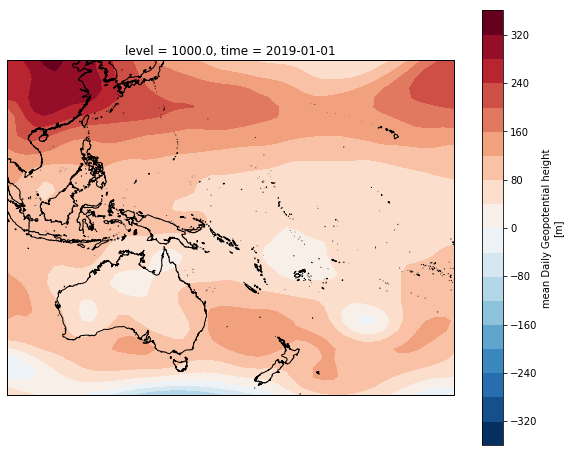

In [33]:
f, ax = plt.subplots(figsize=(10,8), subplot_kw={'projection':crs})
subset['hgt'].plot.contourf(ax=ax, transform=ccrs.PlateCarree(), levels=20);
ax.coastlines(resolution='10m')
f.savefig('../figures/map_hgt', dpi=200, bbox_inches='tight')

In [34]:
crs = ccrs.Orthographic(central_longitude=160)

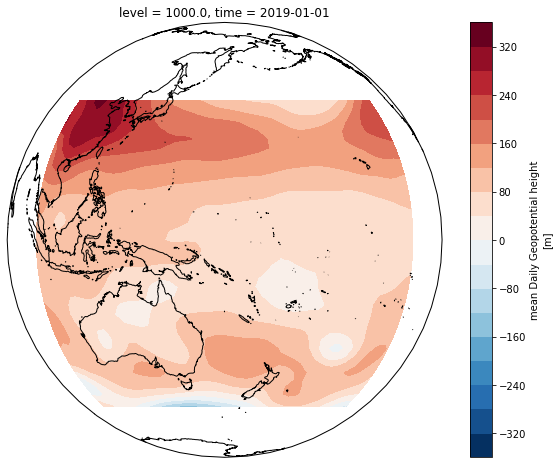

In [35]:
f, ax = plt.subplots(subplot_kw={'projection':crs}, figsize=(10, 8))
# dset.isel(time=0, level=0)['hgt'].plot.contourf(ax=ax, transform=ccrs.PlateCarree(central_longitude=0), levels=20);
subset['hgt'].plot.contourf(ax=ax, transform=ccrs.PlateCarree(), levels=20);
ax.set_global()
ax.coastlines(resolution='50m')

### important to close the datasets, or else you might encounter issues 

In [36]:
dset.close()

In [37]:
subset.close()

### reading multiple files datasets 

reading datasets that are split in different files (i.e. one file per year or month) is relatively easy in xarray, you just need to pass a LIST (Python list) of file paths

In [38]:
import pathlib

In [39]:
path = pathlib.Path('/home/nicolasf/drives/auck_scratch/fauchereaun/Wellington_Python_Workshop_data/')

In [40]:
lfiles = list(path.rglob("ersst.??????.nc"))

In [41]:
lfiles.sort()

In [42]:
len(lfiles)

14

In [43]:
lfiles[0]

PosixPath('/home/nicolasf/drives/auck_scratch/fauchereaun/Wellington_Python_Workshop_data/ersst.201801.nc')

In [44]:
lfiles[-1]

PosixPath('/home/nicolasf/drives/auck_scratch/fauchereaun/Wellington_Python_Workshop_data/ersst.201902.nc')

In [45]:
dset = xr.open_mfdataset(lfiles)

In [46]:
dset

<xarray.Dataset>
Dimensions:  (lat: 89, lev: 1, lon: 180, time: 14)
Coordinates:
  * lat      (lat) float64 -88.0 -86.0 -84.0 -82.0 -80.0 ... 82.0 84.0 86.0 88.0
  * lev      (lev) float64 0.0
  * lon      (lon) float64 0.0 2.0 4.0 6.0 8.0 ... 350.0 352.0 354.0 356.0 358.0
  * time     (time) object 2018-01-01 00:00:00 ... 2019-02-01 00:00:00
Data variables:
    sst      (time, lev, lat, lon) float32 dask.array<shape=(14, 1, 89, 180), chunksize=(1, 1, 89, 180)>
    ssta     (time, lev, lat, lon) float32 dask.array<shape=(14, 1, 89, 180), chunksize=(1, 1, 89, 180)>
Attributes:
    Conventions:                CF-1.6, ACDD-1.3
    metadata_link:              https://doi.org/10.7289/V5T72FNM
    id:                         ersst.v5.201801
    naming_authority:           gov.noaa.ncei
    title:                      NOAA ERSSTv5 (in situ only)
    summary:                    ERSST.v5 is developped based on v4 after revi...
    institution:                NOAA/NESDIS/NCEI/CCOG
    creator_na

In [47]:
dset.nbytes / 1e6

1.796512

In [48]:
dset = dset.squeeze()

In [68]:
subset = dset.sel(lon=slice(100., 280.), lat=slice(-5., 5.))

In [69]:
subset

<xarray.Dataset>
Dimensions:  (lat: 5, lon: 91, time: 14)
Coordinates:
  * lat      (lat) float64 -4.0 -2.0 0.0 2.0 4.0
    lev      float64 0.0
  * lon      (lon) float64 100.0 102.0 104.0 106.0 ... 274.0 276.0 278.0 280.0
  * time     (time) object 2018-01-01 00:00:00 ... 2019-02-01 00:00:00
Data variables:
    sst      (time, lat, lon) float32 dask.array<shape=(14, 5, 91), chunksize=(1, 5, 91)>
    ssta     (time, lat, lon) float32 dask.array<shape=(14, 5, 91), chunksize=(1, 5, 91)>
Attributes:
    Conventions:                CF-1.6, ACDD-1.3
    metadata_link:              https://doi.org/10.7289/V5T72FNM
    id:                         ersst.v5.201801
    naming_authority:           gov.noaa.ncei
    title:                      NOAA ERSSTv5 (in situ only)
    summary:                    ERSST.v5 is developped based on v4 after revi...
    institution:                NOAA/NESDIS/NCEI/CCOG
    creator_name:               Boyin Huang
    creator_email:              boyin.huang@noaa.g

### aggregation functions along dimensions

you can apply functions along the dimensions of a **xarray** dataset, i.e. calculate a mean over time, or (for zonal means), over latitudes

In [70]:
time_mean = subset.mean('time')

In [71]:
time_mean

<xarray.Dataset>
Dimensions:  (lat: 5, lon: 91)
Coordinates:
  * lat      (lat) float64 -4.0 -2.0 0.0 2.0 4.0
    lev      float64 0.0
  * lon      (lon) float64 100.0 102.0 104.0 106.0 ... 274.0 276.0 278.0 280.0
Data variables:
    sst      (lat, lon) float32 dask.array<shape=(5, 91), chunksize=(5, 91)>
    ssta     (lat, lon) float32 dask.array<shape=(5, 91), chunksize=(5, 91)>

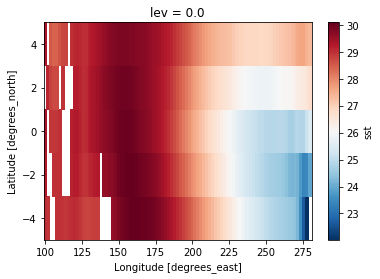

In [72]:
time_mean['sst'].plot(cmap=plt.get_cmap('RdBu_r'))

In [73]:
zonal_mean = subset.mean('lat')

In [74]:
zonal_mean

<xarray.Dataset>
Dimensions:  (lon: 91, time: 14)
Coordinates:
    lev      float64 0.0
  * lon      (lon) float64 100.0 102.0 104.0 106.0 ... 274.0 276.0 278.0 280.0
  * time     (time) object 2018-01-01 00:00:00 ... 2019-02-01 00:00:00
Data variables:
    sst      (time, lon) float32 dask.array<shape=(14, 91), chunksize=(1, 91)>
    ssta     (time, lon) float32 dask.array<shape=(14, 91), chunksize=(1, 91)>

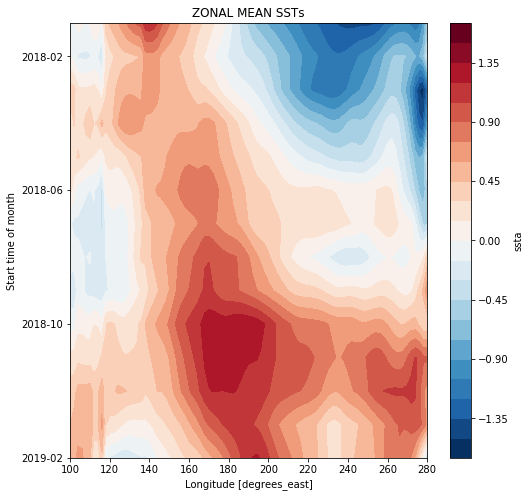

In [80]:
f, my_axes = plt.subplots(figsize=(8,8))
zonal_mean.sel(time=slice('2018', None))['ssta'].plot.contourf(ax=my_axes, levels=30)
my_axes.set_title('ZONAL MEAN SSTs')
my_axes.invert_yaxis()

### And that can be handy to calculate an index ... example with NINO3.4

NINO3.4 is regional avegare of the SST anomalies in the domain (5N-5S, 170W-120W)

In [87]:
index = subset.sel(lon=slice(360-170, 360-120))

In [88]:
NINO34 = index.mean(dim=('lon','lat'))

or 

In [89]:
NINO34 = index.mean('lon').mean('lat')

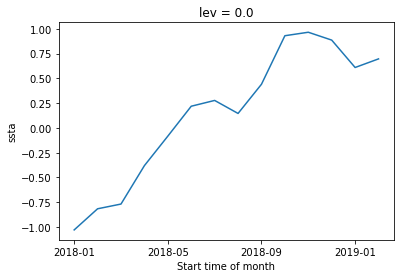

In [91]:
NINO34['ssta'].plot()

### calculates a monthly climatology using the groupby machinery

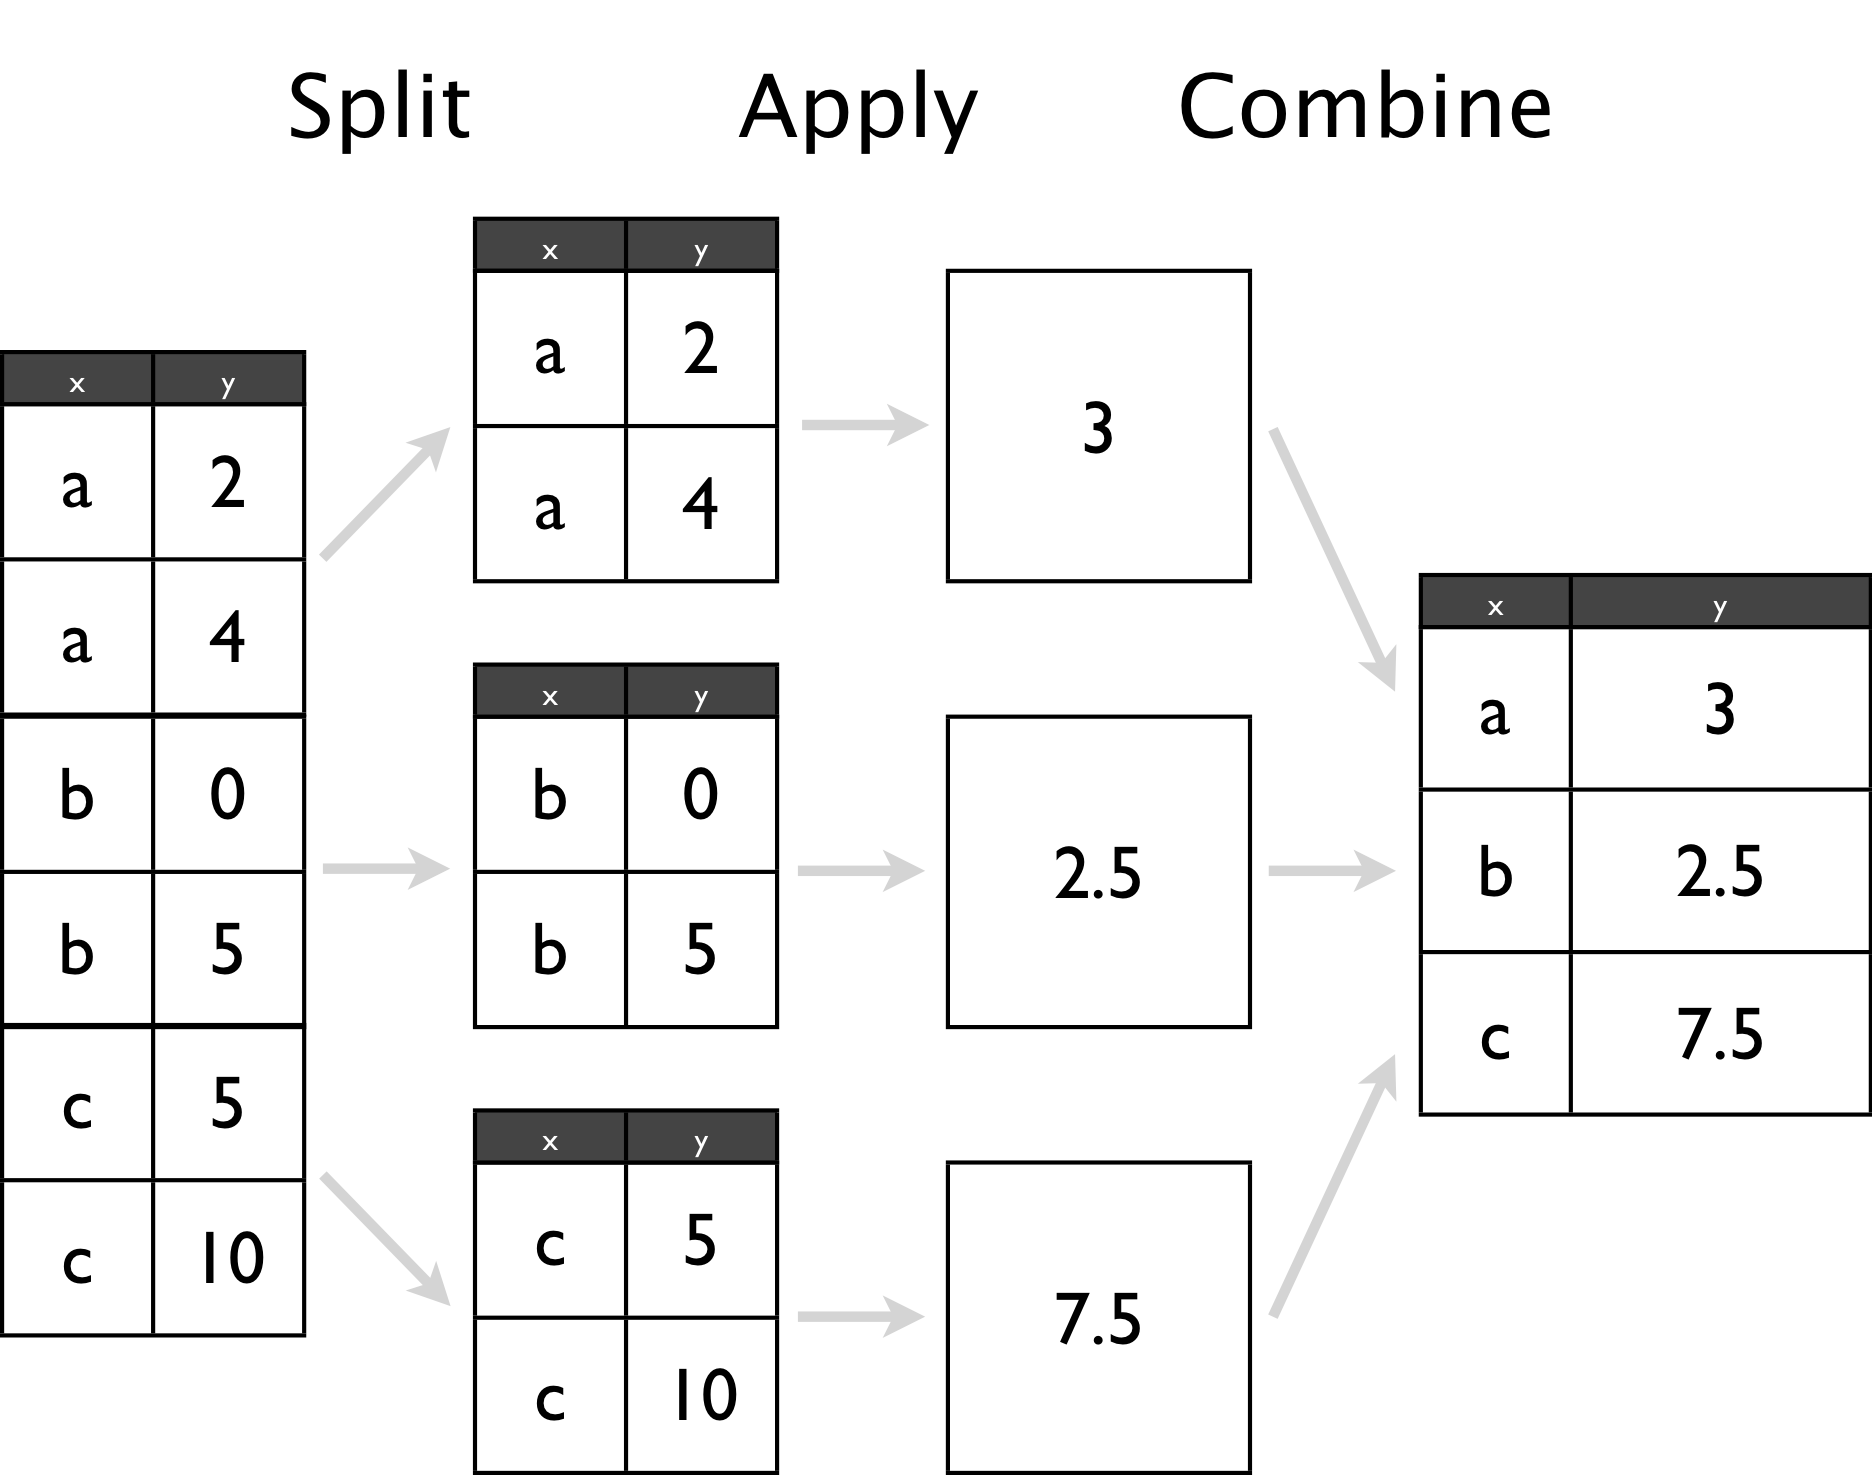

In [92]:
Image(filename='images/split-apply-combine.png', width=800)

### CLIMATOLOGY

In [ ]:
subset

In [ ]:
clim = subset.groupby('time.month').mean('time')

In [ ]:
clim

In [ ]:
clim.sel(month = 8)['sst'].plot(cmap=plt.get_cmap('RdBu_r'))

In [ ]:
clim

In [ ]:
from calendar import month_abbr

In [ ]:
months = month_abbr[1:]

In [ ]:
months

In [ ]:
clim['month'] = (('month'), months)

In [ ]:
clim

In [ ]:
clim.sel(month = 'Jan')['sst'].plot(cmap=plt.get_cmap('RdBu_r'))

### the plot method accepts parameters allowing to fo facetted plots 

In [ ]:
clim['sst'].plot(x='lon', y='lat', col='month', col_wrap=4)

### to plot in on a proper map, use basemap

In [ ]:
from calendar import month_name

In [ ]:
m = bm(projection='cyl',llcrnrlat=lat.min(),urcrnrlat=lat.max(),\
            llcrnrlon=lon.min(),urcrnrlon=lon.max(),\
            lat_ts=0,resolution='c')

In [ ]:
f, axes = plt.subplots(nrows=4,ncols=3, figsize=(14,10))
f.subplots_adjust(hspace=0.1, wspace=0.1)
axes = axes.flatten()
for i, month in enumerate(months): 
    ax = axes[i]
    plot_field(clim.sel(month=month)['sst'], lats, lons, 0, 30, 1, ax=ax, title=month)

**NOTE**: If you have **DAILY** data, you can calculate a daily climatology using the `dayofyear` attribute, e.g.: 
    
```python 

clim = dset.groupby('time.dayofyear').mean('time')

```

### calculates a seasonal (DJF, MAM, ...) climatology

In [ ]:
seas_clim = subset.groupby('time.season').mean('time')

In [ ]:
seas_clim

In [ ]:
f, axes = plt.subplots(nrows=2,ncols=2, figsize=(10,5))
f.subplots_adjust(hspace=0.1, wspace=0.1)
axes = axes.flatten('F')
for i, seas in enumerate(seas_clim['season'].values): 
    ax = axes[i]
    plot_field(seas_clim['sst'][i,:,:].values, lats, lons, 0, 30, 1, ax=ax, title=seas)

### calculates seasonal averages weigthed by the number of days in each month

adapted from [http://xray.readthedocs.org/en/stable/examples/monthly-means.html#monthly-means-example](http://xray.readthedocs.org/en/stable/examples/monthly-means.html#monthly-means-example)

In [ ]:
def get_dpm(time):
    """
    return a array of days per month corresponding to the months provided in `time`
    """
    import calendar as cal
    month_length = np.zeros(len(time), dtype=np.float)

    for i, (month, year) in enumerate(zip(time.month, time.year)):
        month_length[i] = cal.monthrange(year, month)[1]
    return month_length

In [ ]:
def season_mean(ds, calendar='standard'):
    # Make a DataArray of season/year groups
    year_season = xr.DataArray(ds.time.to_index().to_period(freq='Q-NOV').to_timestamp(how='E'),
                                 coords=[ds.time], name='year_season')

    # Make a DataArray with the number of days in each month, size = len(time)
    month_length = xr.DataArray(get_dpm(ds.time.to_index()),
                                  coords=[ds.time], name='month_length')
    # Calculate the weights by grouping by 'time.season'
    weights = month_length.groupby('time.season') / month_length.groupby('time.season').sum()

    # Test that the sum of the weights for each season is 1.0
    np.testing.assert_allclose(weights.groupby('time.season').sum().values, np.ones(4))

    # Calculate the weighted average
    return (ds * weights).groupby('time.season').sum(dim='time')

In [ ]:
sst_seas = season_mean(subset)

In [ ]:
sst_seas

In [ ]:
f, axes = plt.subplots(nrows=2,ncols=2, figsize=(10,5))
f.subplots_adjust(hspace=0.1, wspace=0.1)
axes = axes.flatten('F')
for i, seas in enumerate(seas_clim['season'].data): 
    ax = axes[i]
    plot_field(seas_clim['sst'][i,:,:].data, lats, lons, 0, 30, 1, ax=ax, title=seas)

#### difference between non-weigthed and weighted seasonal climatologies

In [ ]:
diff_seas = seas_clim - sst_seas

In [ ]:
f, axes = plt.subplots(nrows=2,ncols=2, figsize=(10,5))
f.subplots_adjust(hspace=0.1, wspace=0.1)
axes = axes.flatten('F')
for i, seas in enumerate(seas_clim['season'].values): 
    ax = axes[i]
    plot_field(diff_seas['sst'][i,:,:].data, lats, lons, -0.1, 0.1, 0.01, ax=ax, title=seas)

### calculates anomalies with respect to a specific climatological *normal*

#### 1. defines the function

In [ ]:
def demean(x): 
    return x - x.sel(time=slice('1981-01-01','2010-12-01')).mean('time')

#### 2. apply the function to the groupby object

In [ ]:
sst_anoms = subset['sst'].groupby('time.month').apply(demean) 

In [ ]:
plot_field(sst_anoms.sel(time=('2017-01-01')), lats, lons, -2, 2, 0.1, \
           cmap=plt.get_cmap('RdBu_r'), grid=True)

### Creates a xray dataset object from numpy arrays

In [ ]:
lon = np.linspace(0, 357.5, 144, endpoint=True)
lat = np.linspace(-90,90, 73, endpoint=True)

lons, lats = np.meshgrid(lon,lat)

lev = np.array([1000,925,850])
time = pd.date_range(start='2015-1-1',end='2015-1-3')

In [ ]:
lat

In [ ]:
arr = np.random.randn(3,3,73,144)

The dictionnary **keys** are the **variables** contained in the Dataset.<br><br>
The Dictionnary **values** are **tuples**, with first the (or the list of) dimension(s) over which the array varies, then the array itself

In [ ]:
d = {}
d['time'] = ('time',time)
d['latitudes'] = ('latitudes',lat)
d['longitudes'] = ('longitudes', lon)
d['level'] = ('level', lev)
d['var'] = (['time','level','latitudes','longitudes'], arr)

In [ ]:
dset = xr.Dataset(d)

In [ ]:
dset

adding global attributes

In [ ]:
dset.attrs['author'] = 'nicolas.fauchereau@gmail.com'

In [ ]:
dset

adding variables attributes

In [ ]:
dset.longitudes.attrs['units'] = 'degrees_east'
dset.latitudes.attrs['units'] = 'degrees_north'

In [ ]:
dset.latitudes.attrs

In [ ]:
dset.sel(time='2015-1-2', level=1000)

In [ ]:
lons, lats = np.meshgrid(dset['longitudes'], dset['latitudes'])

In [ ]:
plot_field(dset.sel(time='2015-1-2', level=1000)['var'], \
           lats, lons, -4, 4, 0.1, grid=True)

In [ ]:
dset.to_netcdf('./data/dset_from_dict.nc')

In [ ]:
!/usr/local/bin/ncdump -h ./data/dset_from_dict.nc

### Creates a xray dataset object from a Pandas DataFrame

In [ ]:
import string
df = pd.DataFrame(np.random.randn(365,5), \
                  index=pd.date_range(start='2014-1-1', periods=365), \
                  columns=list(string.ascii_letters[:5]))

In [ ]:
df.head()

#### from DataFrame

In [ ]:
df_ds = xr.Dataset.from_dataframe(df)

In [ ]:
df_ds

In [ ]:
group = df_ds.groupby('index.month').mean('index')

In [ ]:
group

#### converts TO a Pandas.DataFrame

In [ ]:
group_df = group.to_dataframe()

In [ ]:
group_df.reindex_axis(list(string.ascii_letters[:5]), axis=1).head()

In [ ]:
df.groupby(df.index.month).mean().head()

### Opening a file throught the network with openDAP

In [ ]:
url = 'http://www.esrl.noaa.gov/psd/thredds/dodsC/Datasets/interp_OLR/olr.mon.mean.nc'

In [ ]:
olr_dset = xr.open_dataset(url)

In [ ]:
olr_sub = olr_dset.sel(time='1998-1-1',lat=slice(30,-30), lon=slice(170, 300))

In [ ]:
m = bm(projection='merc',llcrnrlat=-30,urcrnrlat=30,\
            llcrnrlon=170,urcrnrlon=300,\
            lat_ts=0,resolution='c')

In [ ]:
lons, lats = np.meshgrid(olr_sub['lon'], olr_sub['lat'])

In [ ]:
plot_field(olr_sub['olr'].values, lats, lons, 80, 300, 10, grid=True)